In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/drive')

/
Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow import keras
import seaborn as sn
import tensorflow as tf

In [ ]:
path = "/content/drive/MyDrive/sara_S8/Projet_IA/Dossier sans titre/Train"
labelFile = '/content/drive/MyDrive/sara_S8/Projet_IA/Dossier sans titre/Train.csv'
count = 0
images = []
label = []
batch_size_val=30
steps_per_epoch_val=500
epochs_val=40

In [ ]:
classes_list = os.listdir(path)
classes_list


['40',
 '6',
 '8',
 '42',
 '9',
 '41',
 '5',
 '39',
 '7',
 '4',
 '38',
 '37',
 '36',
 '35',
 '34',
 '33',
 '32',
 '31',
 '30',
 '3',
 '29',
 '27',
 '26',
 '28',
 '25',
 '24',
 '23',
 '22',
 '21',
 '20',
 '2',
 '19',
 '18',
 '17',
 '16',
 '15',
 '13',
 '14',
 '12',
 '11',
 '10',
 '1',
 '0']

In [ ]:
classes_list = os.listdir(path)
print("Total Classes:",len(classes_list))
noOfClasses=len(classes_list)
print("Importing Classes.....")
for x in range (0,len(classes_list)):
    imglist = os.listdir(path+"/"+str(count))
    for y in imglist:
        img = cv2.imread(path+"/"+str(count)+"/"+y)
        img =cv2.resize(img,(32,32))
        images.append(img)
        label.append(count)
    print(count, end =" ")
    count +=1
print(" ")

Total Classes: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [ ]:
images = np.array(images)
classNo = np.array(label)
data=np.array(images)
data= np.array(data).reshape(-1, 32, 32, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=0.2)
Y_tests=y_test
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(24460, 32, 32, 3) (24460,)
Validation(6116, 32, 32, 3) (6116,)
Test(7644, 32, 32, 3) (7644,)


data shape  (39209, 8) <class 'pandas.core.frame.DataFrame'>
[127, 1187, 1256, 887, 1305, 1211, 273, 914, 900, 952, 1250, 826, 1254, 1285, 458, 407, 272, 713, 754, 151, 237, 207, 248, 322, 176, 961, 393, 159, 337, 163, 286, 513, 164, 456, 259, 758, 255, 132, 1337, 190, 224, 156, 145]


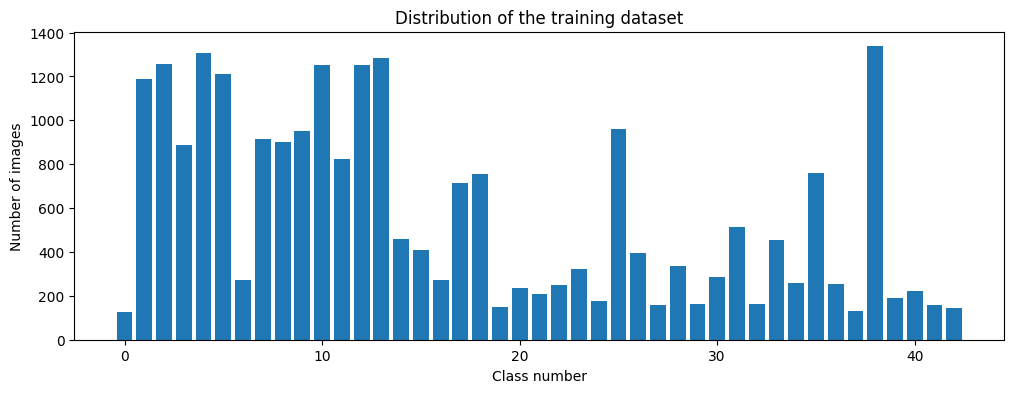

In [ ]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))
num_of_samples = []
cols = 3
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(30, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        if len(x_selected)==0:
            continue
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+str(row["ClassId"]))
            num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255 # image normalization
    return img

In [ ]:
X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

### reshape data into channel 1
X_train=X_train.reshape(-1,32,32,1)
X_validation=X_validation.reshape(-1,32,32,1)
X_test=X_test.reshape(-1,32,32,1)

In [ ]:
#Augmentation of  images
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train,batch_size=20)
X_batch, y_batch = next(batches)

In [ ]:
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

In [ ]:
#CNN Model
def seq_Model():
    no_Of_Filters = 60
    size_of_Filter = (5, 5)
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)
    no_Of_Nodes = 500
    model = Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter, input_shape=(32, 32, 1),
                      activation='tanh')))
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='tanh')))
    model.add(MaxPooling2D(pool_size=size_of_pool))

    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = seq_Model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

In [ ]:
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,
                  epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)

Epoch 1/40
500/500 [==============================] - 15s 20ms/step - loss: 2.6004 - accuracy: 0.2923 - val_loss: 0.8552 - val_accuracy: 0.7345
Epoch 2/40
500/500 [==============================] - 8s 15ms/step - loss: 1.3545 - accuracy: 0.5857 - val_loss: 0.3873 - val_accuracy: 0.8870
Epoch 3/40
500/500 [==============================] - 8s 15ms/step - loss: 0.9527 - accuracy: 0.7053 - val_loss: 0.2530 - val_accuracy: 0.9295
Epoch 4/40
500/500 [==============================] - 9s 18ms/step - loss: 0.7825 - accuracy: 0.7580 - val_loss: 0.1889 - val_accuracy: 0.9438
Epoch 5/40
500/500 [==============================] - 8s 15ms/step - loss: 0.6799 - accuracy: 0.7886 - val_loss: 0.1499 - val_accuracy: 0.9606
Epoch 6/40
500/500 [==============================] - 9s 19ms/step - loss: 0.6066 - accuracy: 0.8121 - val_loss: 0.1126 - val_accuracy: 0.9727
Epoch 7/40
500/500 [==============================] - 10s 19ms/step - loss: 0.5427 - accuracy: 0.8277 - val_loss: 0.1070 - val_accuracy: 0.97

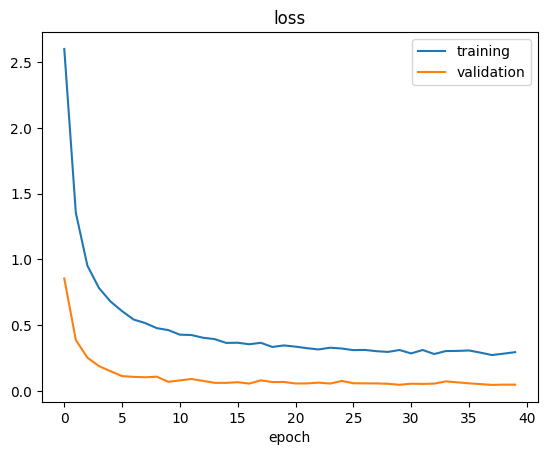

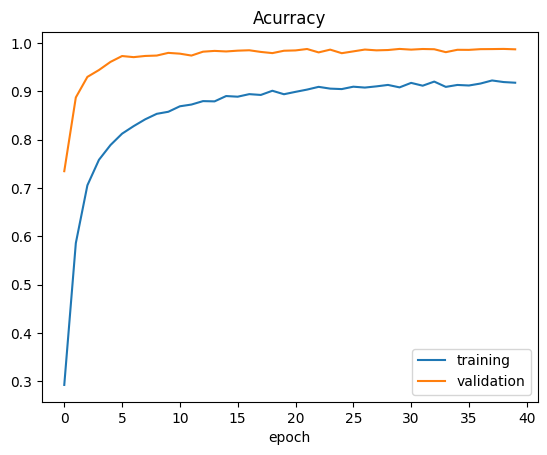

In [ ]:
##Plot Graph##
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

Test Score: 0.05143418163061142
Test Accuracy: 0.9846938848495483


239/239 [==============================] - 1s 2ms/step


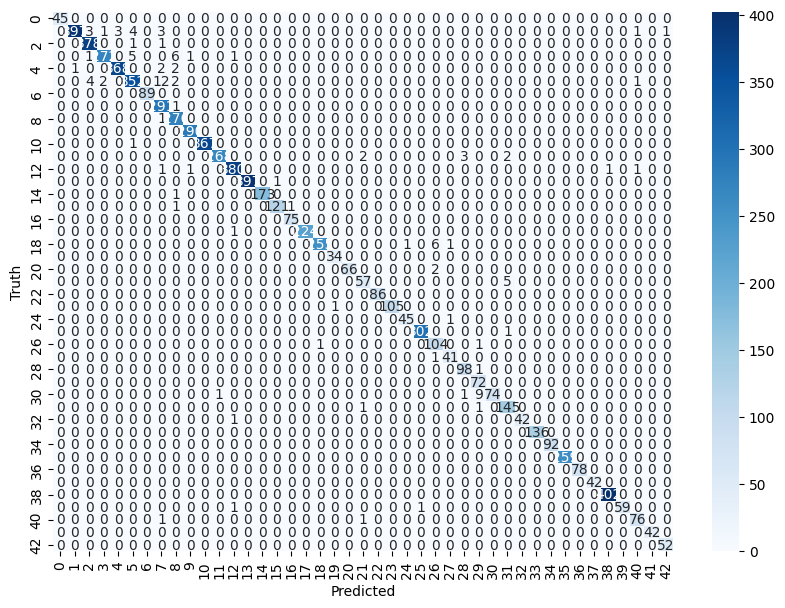

In [ ]:
#####Confusion matrix code####
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm=confusion_matrix(Y_tests,y_pred)     # confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('confusionmatrix.png', dpi=300, bbox_inches='tight')

In [ ]:
model.save('/content/drive/MyDrive/Projet_IA/Dossier sans titre/traffic_sign_model_1.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Projet_IA/Dossier sans titre/traffic_sign_model_1.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
tflite_model = converter.convert()

In [ ]:
open("/content/drive/MyDrive/Projet_IA/Dossier sans titre/converted_model.tflite_1", "wb").write(tflite_model)

1516788

In [ ]:
def getCalssName(classNo):
    if classNo == 0:
        return 'Speed Limit 20 km/h'
    elif classNo == 1:
        return 'Speed Limit 30 km/h'
    elif classNo == 2:
        return 'Speed Limit 50 km/h'
    elif classNo == 3:
        return 'Speed Limit 60 km/h'
    elif classNo == 4:
        return 'Speed Limit 70 km/h'
    elif classNo == 5:
        return 'Speed Limit 80 km/h'
    elif classNo == 6:
        return 'End of Speed Limit 80 km/h'
    elif classNo == 7:
        return 'Speed Limit 100 km/h'
    elif classNo == 8:
        return 'Speed Limit 120 km/h'
    elif classNo == 9:
        return 'No passing'
    elif classNo == 10:
        return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11:
        return 'Right-of-way at the next intersection'
    elif classNo == 12:
        return 'Priority road'
    elif classNo == 13:
        return 'Yield'
    elif classNo == 14:
        return 'Stop'
    elif classNo == 15:
        return 'No vechiles'
    elif classNo == 16:
        return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17:
        return 'No entry'
    elif classNo == 18:
        return 'General caution'
    elif classNo == 19:
        return 'Dangerous curve to the left'
    elif classNo == 20:
        return 'Dangerous curve to the right'
    elif classNo == 21:
        return 'Double curve'
    elif classNo == 22:
        return 'Bumpy road'
    elif classNo == 23:
        return 'Slippery road'
    elif classNo == 24:
        return 'Road narrows on the right'
    elif classNo == 25:
        return 'Road work'
    elif classNo == 26:
        return 'Traffic signals'
    elif classNo == 27:
        return 'Pedestrians'
    elif classNo == 28:
        return 'Children crossing'
    elif classNo == 29:
        return 'Bicycles crossing'
    elif classNo == 30:
        return 'Beware of ice/snow'
    elif classNo == 31:
        return 'Wild animals crossing'
    elif classNo == 32:
        return 'End of all speed and passing limits'
    elif classNo == 33:
        return 'Turn right ahead'
    elif classNo == 34:
        return 'Turn left ahead'
    elif classNo == 35:
        return 'Ahead only'
    elif classNo == 36:
        return 'Go straight or right'
    elif classNo == 37:
        return 'Go straight or left'
    elif classNo == 38:
        return 'Keep right'
    elif classNo == 39:
        return 'Keep left'
    elif classNo == 40:
        return 'Roundabout mandatory'
    elif classNo == 41:
        return 'End of no passing'
    elif classNo == 42:
        return 'End of no passing by vechiles over 3.5 metric tons'


1/1 [==============================] - 7s 7s/step


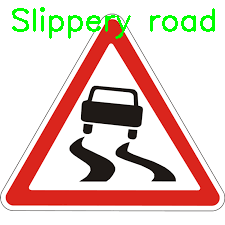

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Charger le modèle entraîné
model = tf.keras.models.load_model('/content/drive/MyDrive/sara_S8/Projet_IA/Dossier sans titre/traffic_sign_model.h5')


# Ouvrir la vidéo
cap = cv2.VideoCapture("/content/images.png")

while True:
    # Lire une image de la vidéo
    ret, frame = cap.read()

    # Arrêter si la fin de la vidéo est atteinte
    if not ret:
        break

    # Prétraitement de l'image
    img = cv2.resize(frame, (32, 32))
    img = grayscale(img)
    img = equalize(img)
    img = img / 255
    img = img.reshape(-1, 32, 32, 1)

    # Effectuer la prédiction
    prediction = model.predict(img)
    class_id = np.argmax(prediction)

    # Afficher le résultat
    class_name =  getCalssName(class_id)
    #class_name = classes_list[class_id]
    cv2.putText(frame, class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2_imshow( frame)

    # Attendre une touche pour quitter
    if cv2.waitKey(1) == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()


detection


In [ ]:
import numpy as np
import cv2
from tensorflow import keras
import tensorflow as tf
from google.colab.patches import cv2_imshow
threshold = 0.75  # THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
model = tf.keras.models.load_model('/content/drive/MyDrive/Projet_IA/Dossier sans titre/traffic_sign_model.h5')


def preprocess_img(imgBGR, erode_dilate=True):  # pre-processing fro detect signs in  image.
    rows, cols, _ = imgBGR.shape
    imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)
    Bmin = np.array([100, 43, 46])
    Bmax = np.array([124, 255, 255])
    img_Bbin = cv2.inRange(imgHSV, Bmin, Bmax)

    Rmin1 = np.array([0, 43, 46])
    Rmax1 = np.array([10, 255, 255])
    img_Rbin1 = cv2.inRange(imgHSV, Rmin1, Rmax1)

    Rmin2 = np.array([156, 43, 46])
    Rmax2 = np.array([180, 255, 255])
    img_Rbin2 = cv2.inRange(imgHSV, Rmin2, Rmax2)
    img_Rbin = np.maximum(img_Rbin1, img_Rbin2)
    img_bin = np.maximum(img_Bbin, img_Rbin)

    if erode_dilate is True:
        kernelErosion = np.ones((3, 3), np.uint8)
        kernelDilation = np.ones((3, 3), np.uint8)
        img_bin = cv2.erode(img_bin, kernelErosion, iterations=2)
        img_bin = cv2.dilate(img_bin, kernelDilation, iterations=2)

    return img_bin


def contour_detect(img_bin, min_area, max_area=-1, wh_ratio=2.0):
    rects = []
    contours, _ = cv2.findContours(img_bin.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if len(contours) == 0:
        return rects

    max_area = img_bin.shape[0] * img_bin.shape[1] if max_area < 0 else max_area
    for contour in contours:
        area = cv2.contourArea(contour)
        if area >= min_area and area <= max_area:
            x, y, w, h = cv2.boundingRect(contour)
            if 1.0 * w / h < wh_ratio and 1.0 * h / w < wh_ratio:
                rects.append([x, y, w, h])
    return rects


def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255
    return img


def getCalssName(classNo):
    if classNo == 0:
        return 'Speed Limit 20 km/h'
    elif classNo == 1:
        return 'Speed Limit 30 km/h'
    elif classNo == 2:
        return 'Speed Limit 50 km/h'
    elif classNo == 3:
        return 'Speed Limit 60 km/h'
    elif classNo == 4:
        return 'Speed Limit 70 km/h'
    elif classNo == 5:
        return 'Speed Limit 80 km/h'
    elif classNo == 6:
        return 'End of Speed Limit 80 km/h'
    elif classNo == 7:
        return 'Speed Limit 100 km/h'
    elif classNo == 8:
        return 'Speed Limit 120 km/h'
    elif classNo == 9:
        return 'No passing'
    elif classNo == 10:
        return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11:
        return 'Right-of-way at the next intersection'
    elif classNo == 12:
        return 'Priority road'
    elif classNo == 13:
        return 'Yield'
    elif classNo == 14:
        return 'Stop'
    elif classNo == 15:
        return 'No vechiles'
    elif classNo == 16:
        return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17:
        return 'No entry'
    elif classNo == 18:
        return 'General caution'
    elif classNo == 19:
        return 'Dangerous curve to the left'
    elif classNo == 20:
        return 'Dangerous curve to the right'
    elif classNo == 21:
        return 'Double curve'
    elif classNo == 22:
        return 'Bumpy road'
    elif classNo == 23:
        return 'Slippery road'
    elif classNo == 24:
        return 'Road narrows on the right'
    elif classNo == 25:
        return 'Road work'
    elif classNo == 26:
        return 'Traffic signals'
    elif classNo == 27:
        return 'Pedestrians'
    elif classNo == 28:
        return 'Children crossing'
    elif classNo == 29:
        return 'Bicycles crossing'
    elif classNo == 30:
        return 'Beware of ice/snow'
    elif classNo == 31:
        return 'Wild animals crossing'
    elif classNo == 32:
        return 'End of all speed and passing limits'
    elif classNo == 33:
        return 'Turn right ahead'
    elif classNo == 34:
        return 'Turn left ahead'
    elif classNo == 35:
        return 'Ahead only'
    elif classNo == 36:
        return 'Go straight or right'
    elif classNo == 37:
        return 'Go straight or left'
    elif classNo == 38:
        return 'Keep right'
    elif classNo == 39:
        return 'Keep left'
    elif classNo == 40:
        return 'Roundabout mandatory'
    elif classNo == 41:
        return 'End of no passing'
    elif classNo == 42:
        return 'End of no passing by vechiles over 3.5 metric tons'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[100, 161, 28, 44], [453, 158, 30, 33]]
1/1 [==============================] - 0s 22ms/step


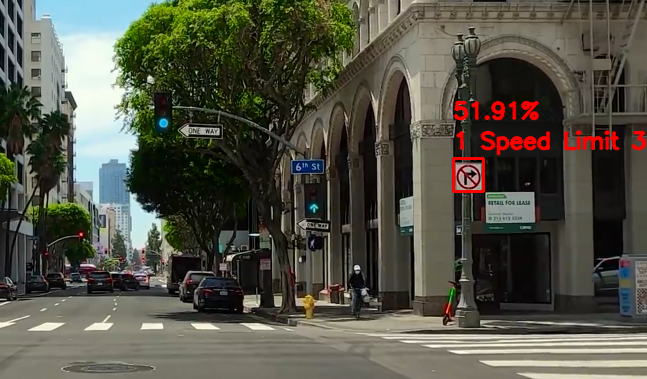

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Chargement de l'image
img = cv2.imread('/content/picc.png')

# Définition des paramètres
threshold = 0.75
font = cv2.FONT_HERSHEY_SIMPLEX

# Prétraitement de l'image
img_bin = preprocess_img(img, False)

# Obtention des dimensions de l'image
cols = img.shape[1]
rows = img.shape[0]

# Détection des contours
min_area = img_bin.shape[0] * img.shape[1] / (25 * 25)
rects = contour_detect(img_bin, min_area=min_area)
print(rects)
# Copie de l'image pour dessiner les boîtes englobantes
img_bbx = img.copy()

# Boucle sur les boîtes englobantes détectées
for rect in rects:
    # Calcul des coordonnées de la boîte englobante
    xc = int(rect[0] + rect[2] / 2)
    yc = int(rect[1] + rect[3] / 2)

    size = max(rect[2], rect[3])
    x1 = max(0, int(xc - size / 2))
    y1 = max(0, int(yc - size / 2))
    x2 = min(cols, int(xc + size / 2))
    y2 = min(rows, int(yc + size / 2))

    # Récupération de la région d'intérêt
    crop_img = np.asarray(img[y1:y2, x1:x2])
    crop_img = cv2.resize(crop_img, (32, 32))
    crop_img = preprocessing(crop_img)
    crop_img = crop_img.reshape(1, 32, 32, 1)

    # Prédiction de la classe
    predictions = model.predict(crop_img)
    classIndex =np.argmax( predictions)
    probabilityValue = np.amax(predictions)

    # Affichage des résultats si la probabilité est supérieure au seuil
    if probabilityValue > 0.50:
        # Dessin de la boîte englobante
        #cv2.rectangle(img_bbx, (()), (x2 - x1, y2 - y1), (0, 0, 255), 2)
        cv2.rectangle(img_bbx, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 0, 255), 2)
        # Affichage du nom de la classe
        cv2.putText(img_bbx, str(classIndex) + " " + str(getCalssName(classIndex)), (rect[0], rect[1] - 10), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        # Affichage de la probabilité
        cv2.putText(img_bbx, str(round(probabilityValue * 100, 2)) + "%", (rect[0], rect[1] - 40), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)

# Affichage de l'image avec les résultats

cv2_imshow(img_bbx)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
!pip install --upgrade tensorflow keras gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [ ]:
import gradio as gr
import numpy as np
import cv2
from tensorflow import keras
import tensorflow as tf
# Charger votre modèle pré-entraîné
model = tf.keras.models.load_model('/content/drive/MyDrive/sara_S8/Projet_IA/Dossier sans titre/traffic_sign_model.h5')
# Définir la fonction de prédiction
def predict(image):
    # Prétraitement de l'image
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Effectuer la prédiction avec votre modèle
    prediction = model.predict(img)
    class_id = np.argmax(prediction)
    class_name =  getCalssName(class_id.json())

    # Renvoyer le résultat de la prédiction
    return f"Classe prédite : {class_name}"

# Define the input and output components
image_input = gr.inputs.Image(shape=(224, 224))
label_output = gr.outputs.Label(num_top_classes=1)

# Définir l'interface Gradio
iface = gr.Interface(fn=predict, inputs=image_input,
    outputs=label_output,
    title="Image Classification using Tenseflow",)

# Lancer l'interface Gradio
iface.launch()


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
import gradio as gr
import numpy as np
import cv2
from tensorflow import keras
import tensorflow as tf
model = tf.keras.models.load_model

In [ ]:
# Charger votre modèle pré-entraîné
model = tf.keras.models.load_model('/content/traffic_sign_model.h5')

# Définir la fonction de prédiction
def predict(image):
    # Prétraitement de l'image
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    # Effectuer la prédiction avec votre modèle
    prediction = model.predict(img)
    class_id = np.argmax(prediction)
    class_name =  getCalssName(class_id)

    # Renvoyer le résultat de la prédiction
    return f"Classe prédite : {class_name}"

# Définir l'interface Gradio
iface = gr.Interface(fn=predict, inputs=gr.inputs.Image(), outputs="text")

# Lancer l'interface Gradio
iface.launch()